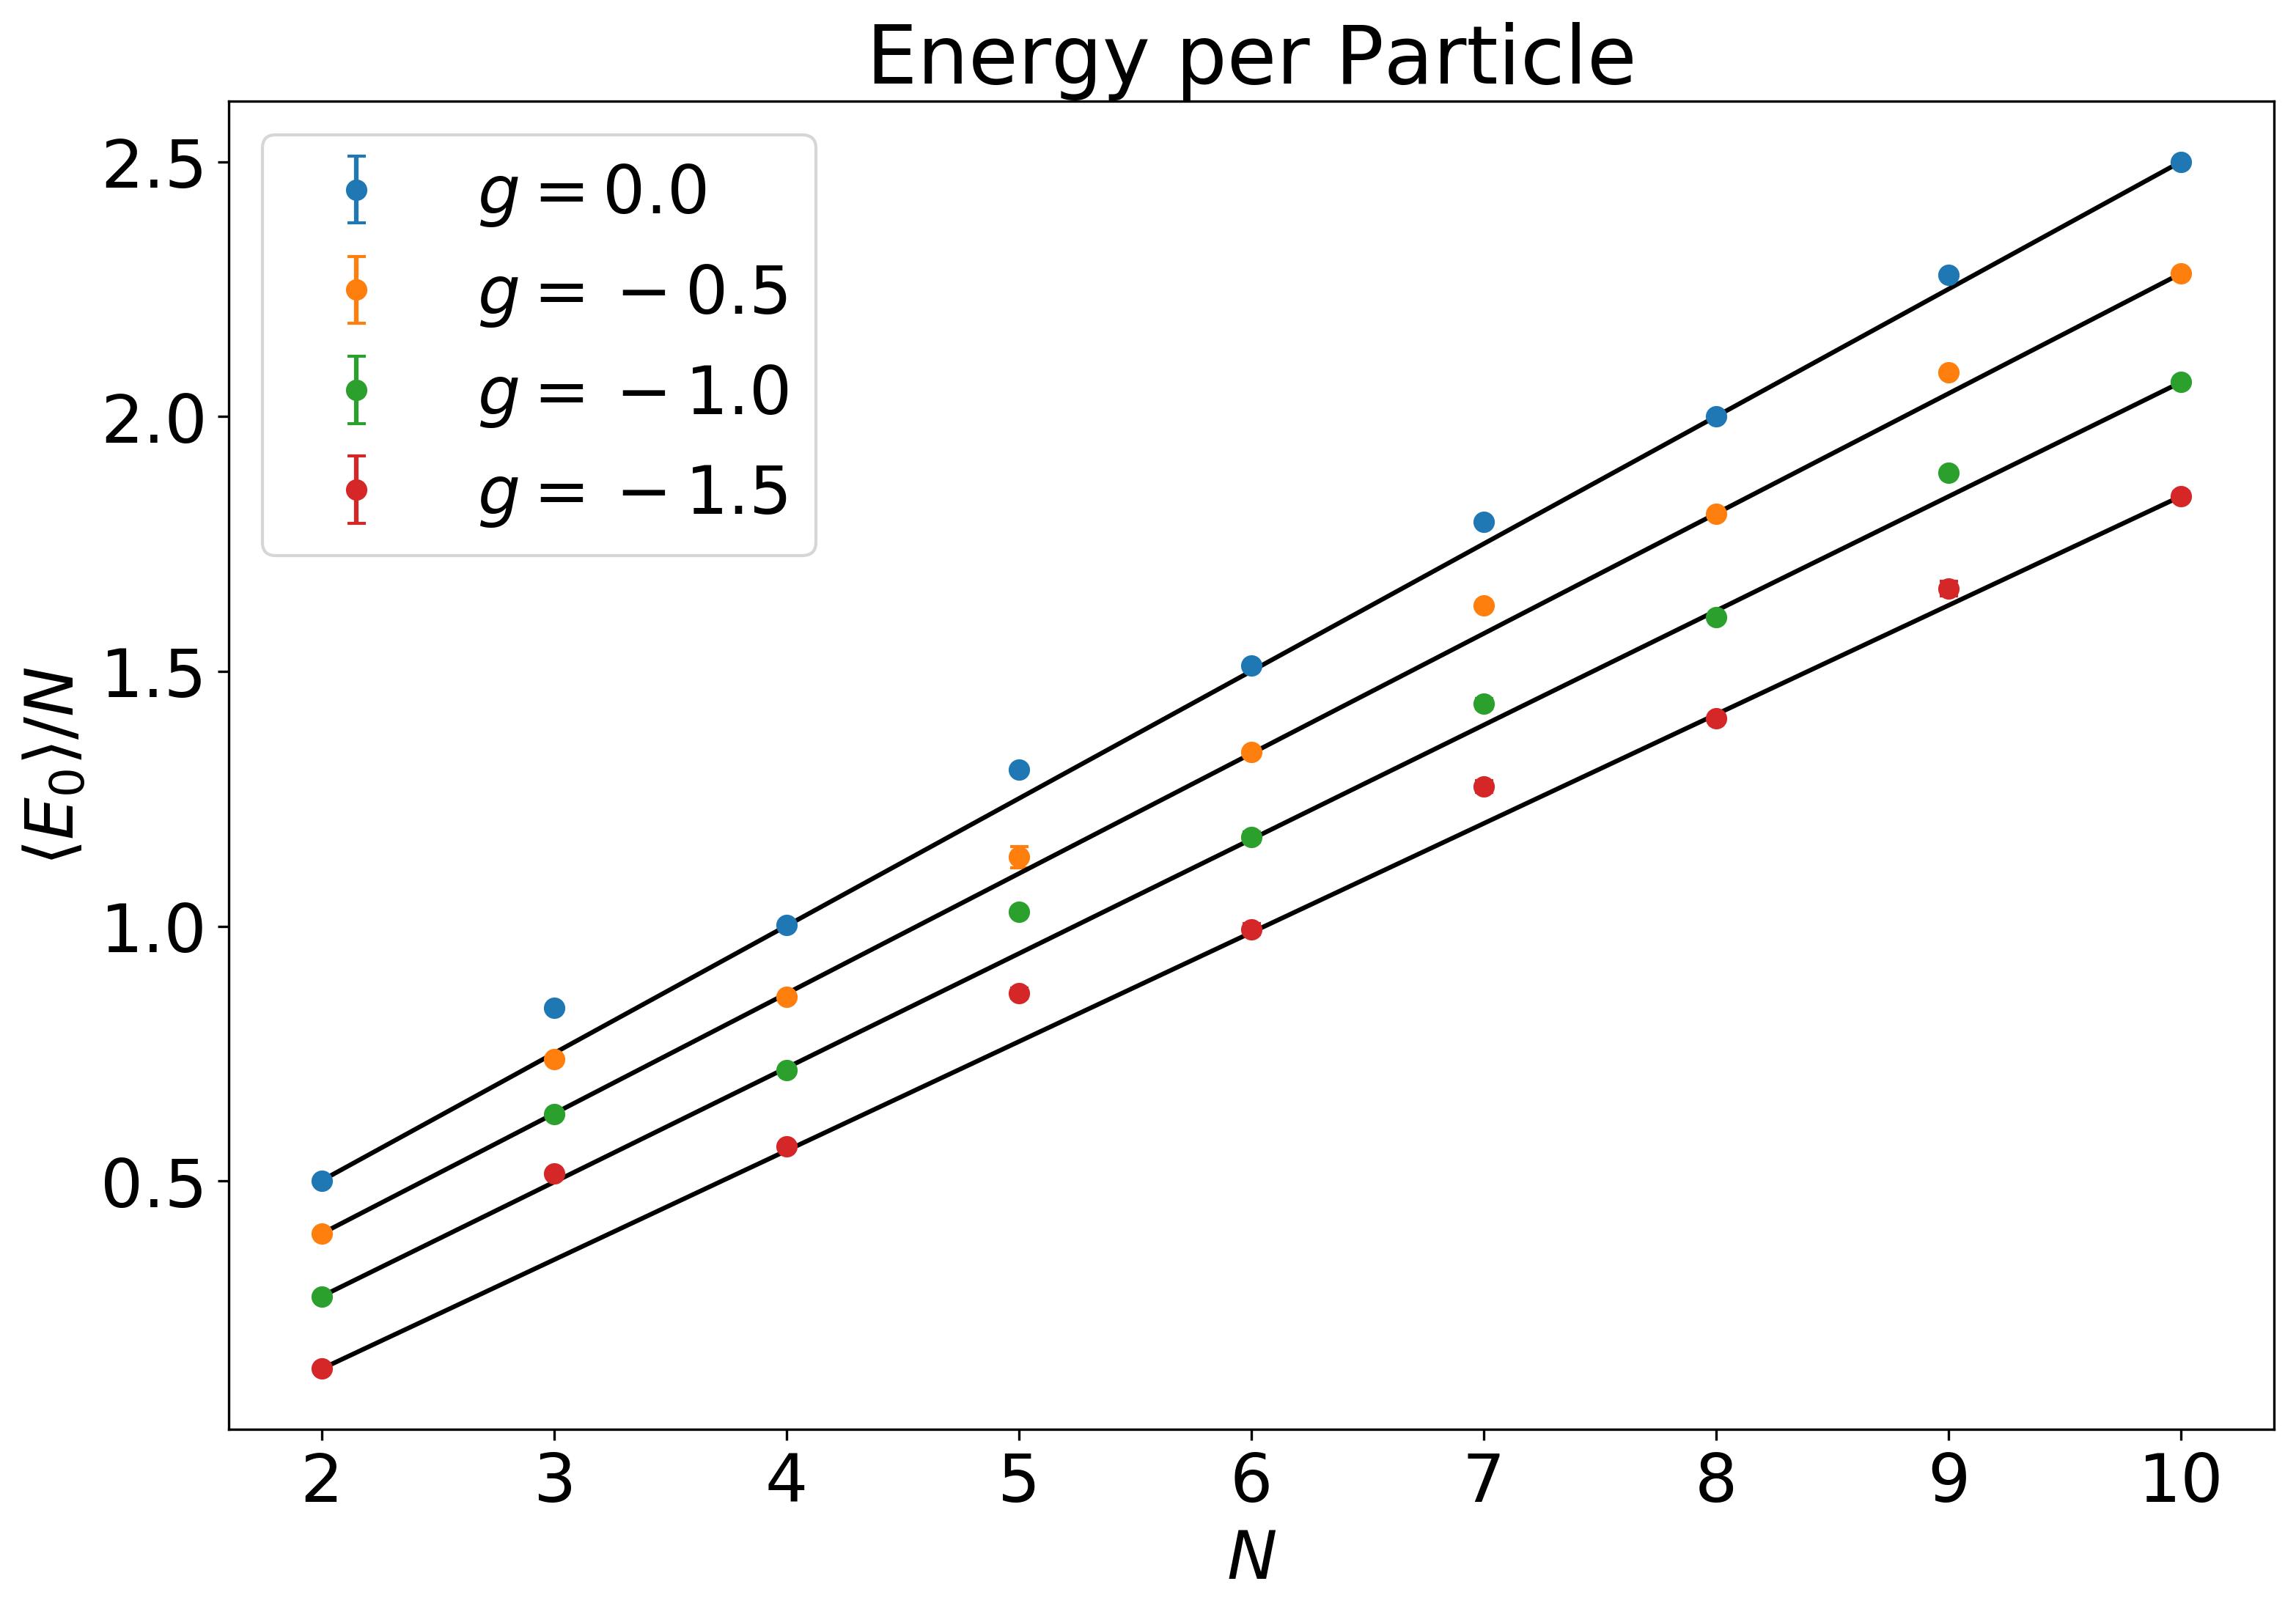

In [113]:
# reads in the energy data for 4+4, 4+5, and 5+5 for the attractive case,
# and then plots energy as a function of the number of particles
# we should see some pairing effects

import numpy as np 
from matplotlib import pyplot as plt
import csv
import gvar as gv

plt.figure(figsize=(12,8), dpi=300)
plt.rcParams.update({'font.size': 22})

def parse(filename):
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)

    # the first column is the value of g
    # second column is the energy
    # third column is the uncertainty
    gs = []
    es = []
    for r in data:
        gs.append(r[0])
        es.append(gv.gvar(r[1], r[2]))
    return np.array(gs), np.array(es)

# now parse the data for the 3 cases
#TODO: get this data set up
gs, four_four_es = parse("4+4.csv")
_, four_five_es = parse("4+5.csv")
_, five_five_es = parse("5+5.csv")
_, one_one_es = parse("1+1.csv")
_, one_two_es = parse("1+2.csv")
_, two_two_es = parse("2+2.csv")
_, two_three_es = parse("2+3.csv")
_, three_three_es = parse("3+3.csv")
_, three_four_es = parse("3+4.csv")

# scale the energies by the number of particles
one_one_es /= 2
one_two_es /= 3
two_two_es /= 4
two_three_es /= 5
three_three_es /= 6
three_four_es /= 7
four_four_es /= 8
four_five_es /= 9
five_five_es /= 10

# now plot the average energy for each value of g
for i in range(len(gs)):
    g = gs[i]
    # get the values to plot
    ys = [one_one_es[i].mean,one_two_es[i].mean,two_two_es[i].mean, two_three_es[i].mean,three_three_es[i].mean,three_four_es[i].mean, four_four_es[i].mean,four_five_es[i].mean,five_five_es[i].mean]
    uncerts =[one_one_es[i].sdev,one_two_es[i].sdev,two_two_es[i].sdev, two_three_es[i].sdev,three_three_es[i].sdev,three_four_es[i].sdev, four_four_es[i].sdev, four_five_es[i].sdev, five_five_es[i].sdev]
    plt.errorbar([2,3,4,5,6,7,8,9,10], ys, yerr=uncerts,fmt='o' ,label='$g={}$'.format(g),capsize=3)
plt.plot([2, 10],[one_one_es[0].mean, five_five_es[0].mean], color='black')
plt.plot([2, 10],[one_one_es[1].mean, five_five_es[1].mean], color='black')
plt.plot([2, 10],[one_one_es[2].mean, five_five_es[2].mean], color='black')
plt.plot([2, 10],[one_one_es[3].mean, five_five_es[3].mean], color='black')
plt.title("Energy per Particle")
plt.xlabel(r"$N$")
plt.ylabel(r"$\left\langle E_0\right\rangle/N$")
plt.legend()
plt.show()

for i in range(len(gs)):
    g = gs[i]
    ys = [one_one_es[i].mean,one_two_es[i].mean,two_two_es[i].mean, two_three_es[i].mean,three_three_es[i].mean,three_four_es[i].mean, four_four_es[i].mean,four_five_es[i].mean,five_five_es[i].mean]
    uncerts =[one_one_es[i].sdev,one_two_es[i].sdev,two_two_es[i].sdev, two_three_es[i].sdev,three_three_es[i].sdev,three_four_es[i].sdev, four_four_es[i].sdev, four_five_es[i].sdev, five_five_es[i].sdev]
    # save the data to a file named g_0.csv
    with open('g_{}.csv'.format(g), 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(ys)
        writer.writerow(uncerts)

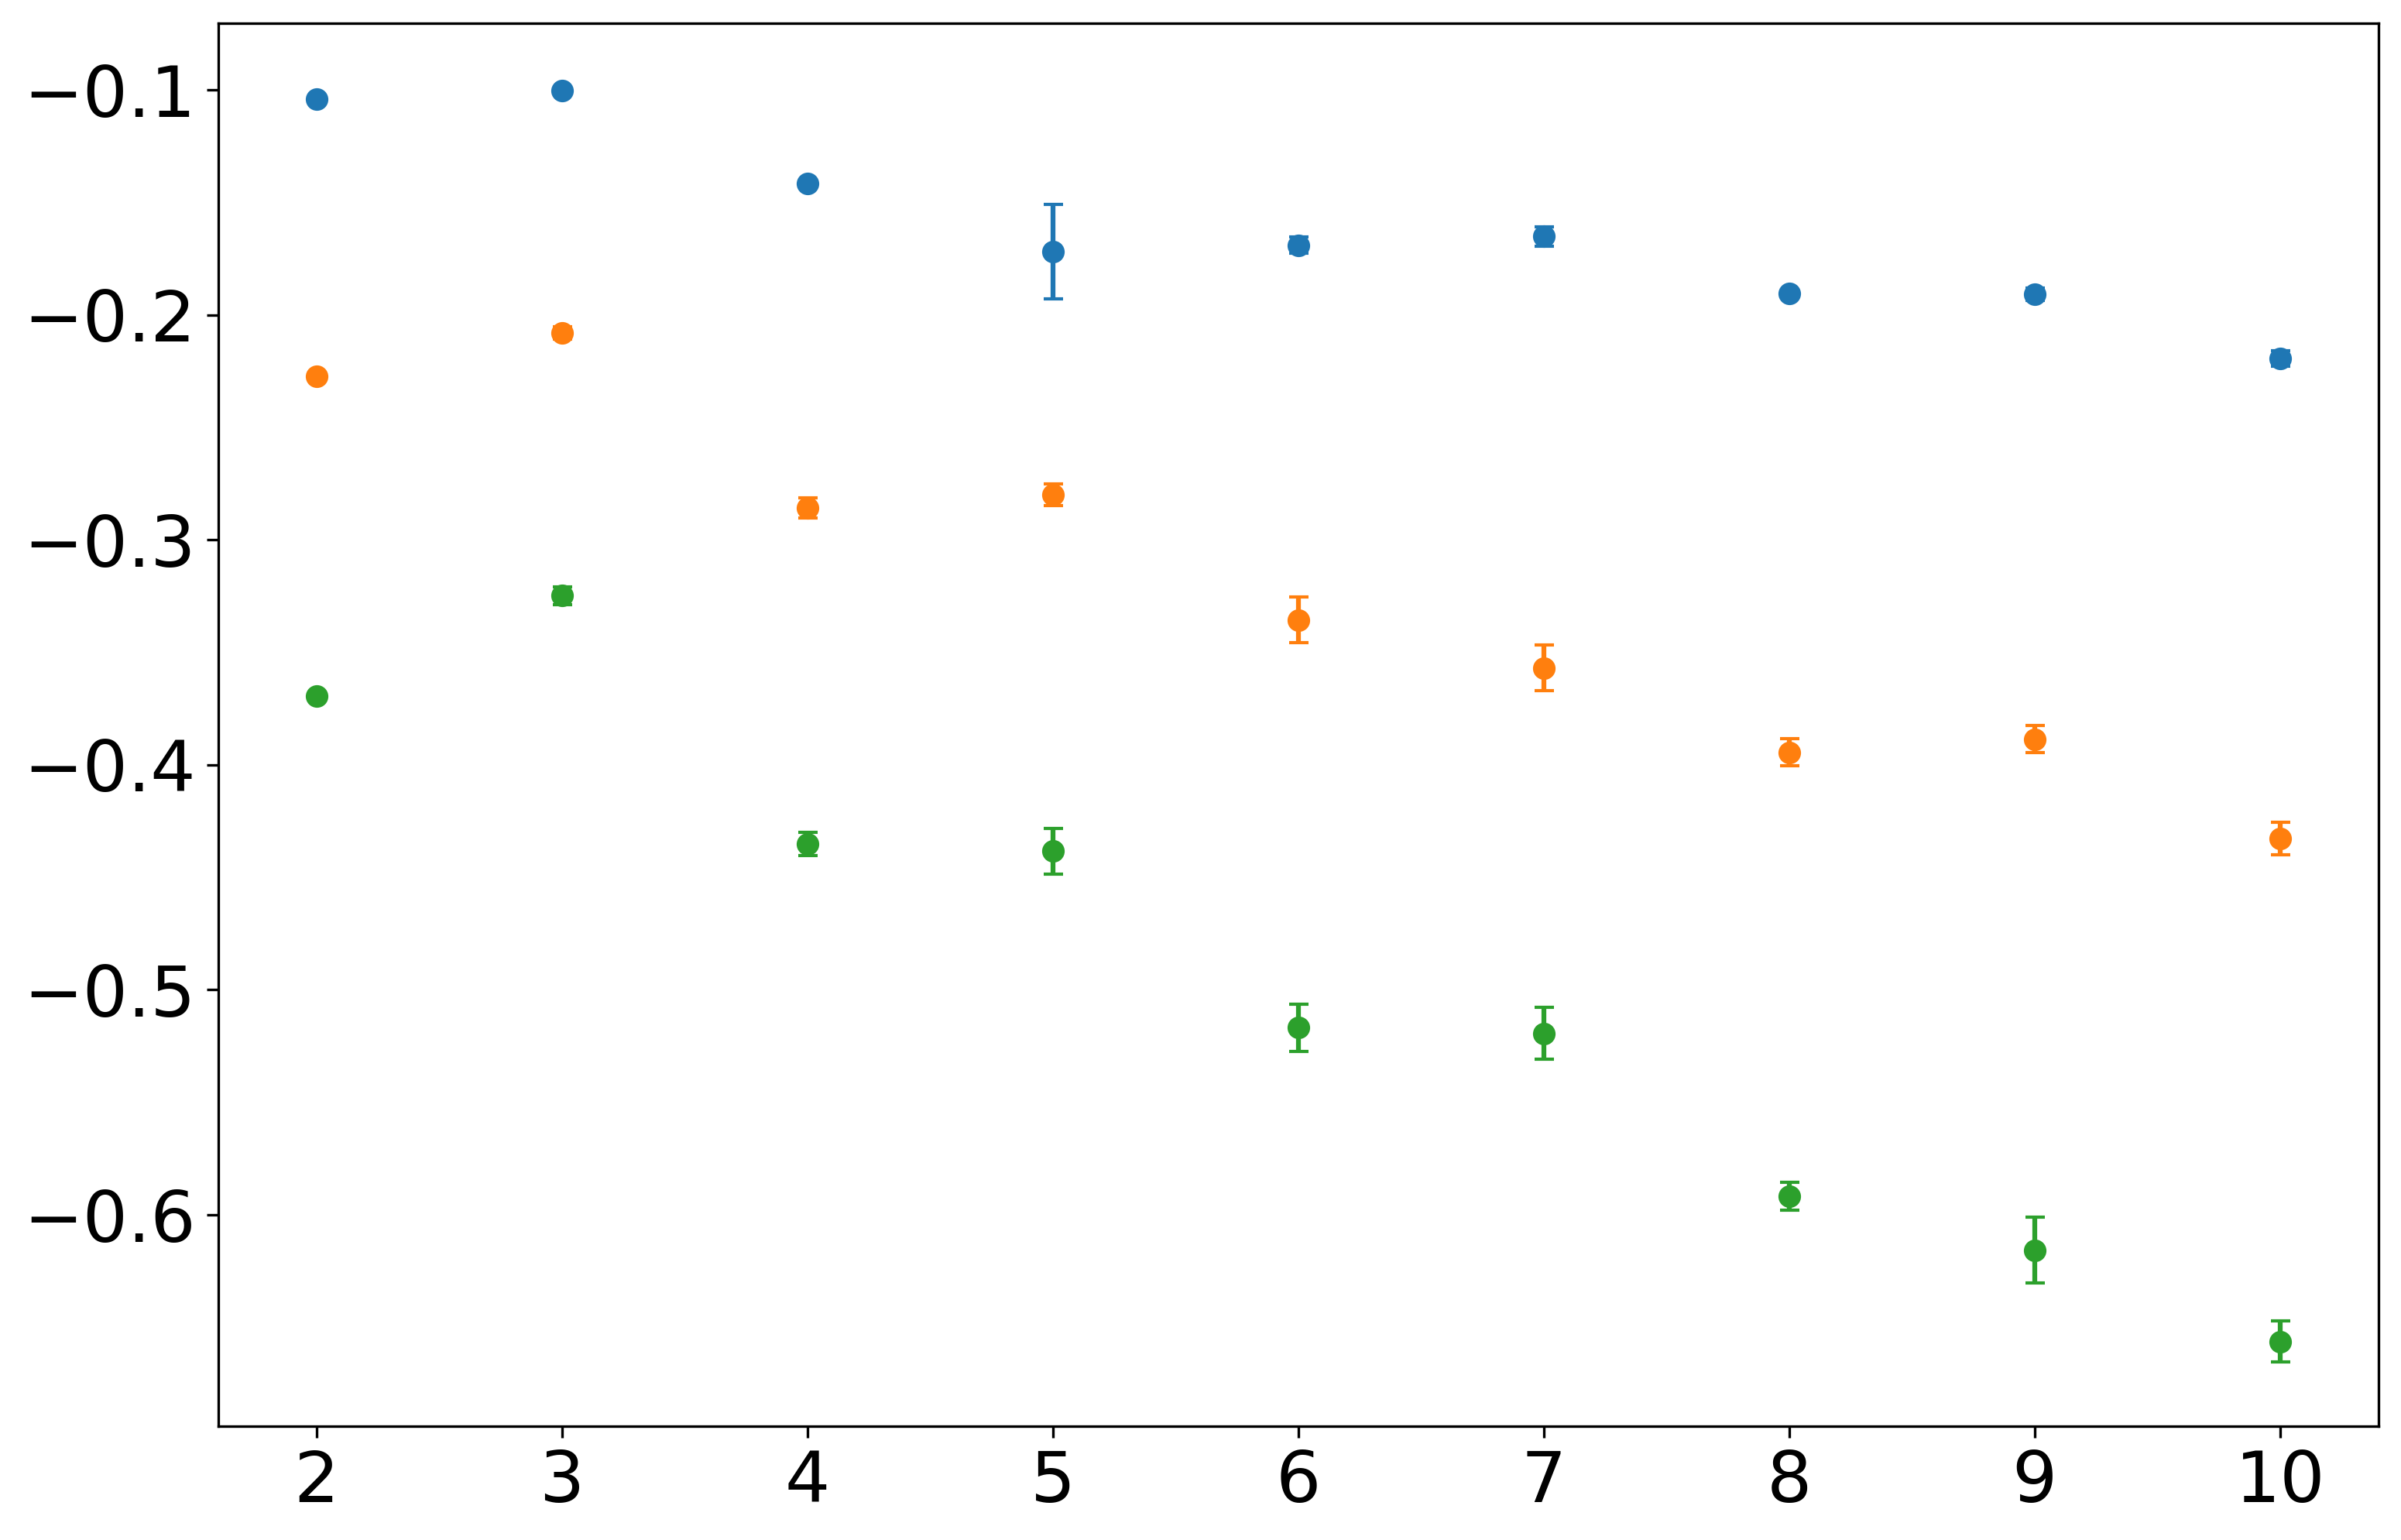

In [114]:
# make the same plot but we subtract off the free case

plt.figure(figsize=(12,8), dpi=300)
plt.rcParams.update({'font.size': 22})

i=0
y_zeros = [one_one_es[i].mean,one_two_es[i].mean,two_two_es[i].mean,two_three_es[i].mean,three_three_es[i].mean,three_four_es[i].mean, four_four_es[i].mean,four_five_es[i].mean,five_five_es[i].mean]

for i in range(1,len(gs)):
    g = gs[i]
    # get the values to plot
    ys = [one_one_es[i].mean,one_two_es[i].mean,two_two_es[i].mean,two_three_es[i].mean,three_three_es[i].mean,three_four_es[i].mean, four_four_es[i].mean,four_five_es[i].mean,five_five_es[i].mean]
    uncerts =[one_one_es[i].sdev,one_two_es[i].sdev,two_two_es[i].sdev,two_three_es[i].sdev,three_three_es[i].sdev,three_four_es[i].sdev, four_four_es[i].sdev, four_five_es[i].sdev, five_five_es[i].sdev]
    vard = np.array([gv.gvar(ys[i], uncerts[i]) for i in range(len(ys))])
    res = vard - y_zeros
    res_ys = [r.mean for r in res]
    res_uncerts = [r.sdev for r in res]
    plt.errorbar([2,3,4,5,6,7,8,9,10], res_ys, yerr=res_uncerts,fmt='o' ,label='$g={}$'.format(g),capsize=3)

